                    PREDICTION DU CANCER DU SEIN 

In [673]:
##----- Importation des bibliotheques et modules utiles pour ce projet ----##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


                    IMPORTATION DES DONNEES

In [674]:
data = pd.read_csv("breast_cancer.csv", sep=",")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


                    PREMIERES OBSERVATIONS 

In [675]:
#----Informations sur les colonnes (types, valeurs nulles)----#

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

> Toutes le variables du dataset sont numériques :

- id -> entier;

- le reste -> réel.

> sauf :
    
- diagnostic qui prend les valeurs 'M' ou 'B'.

> Outre 'Unnamed: 32' qui n'a pas de valeur, aucune variable ne contient des valeurs manquantes.

In [676]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


                    DEBUT DU NETTOYAGE

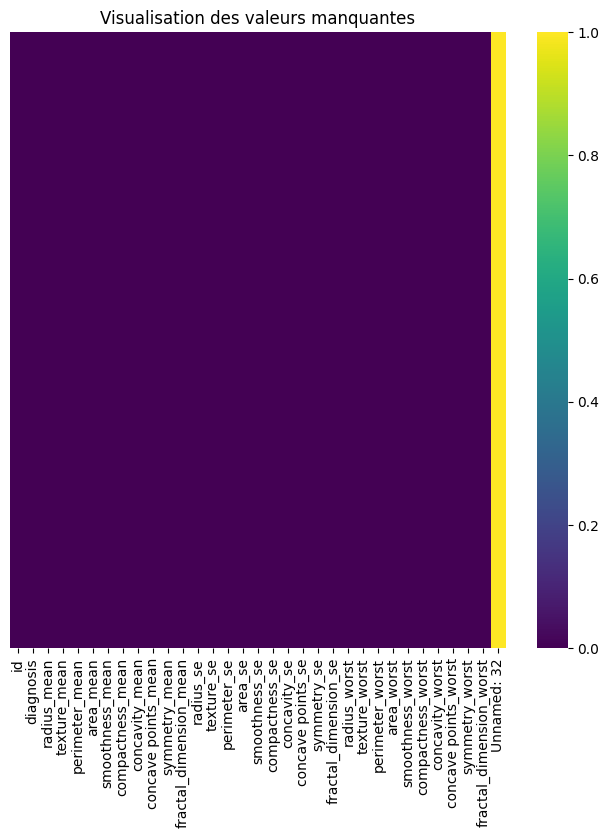

In [677]:
##--- Visualisation des valeurs manquantes ---##

plt.figure(figsize=(8, 8))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis', yticklabels=False)

plt.title('Visualisation des valeurs manquantes')
plt.show()


    Suppression des variables inutiles

In [678]:
data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
data.shape

(569, 31)

    Visualisation de la distribution du diagnostic

diagnosis
B    357
M    212
Name: count, dtype: int64


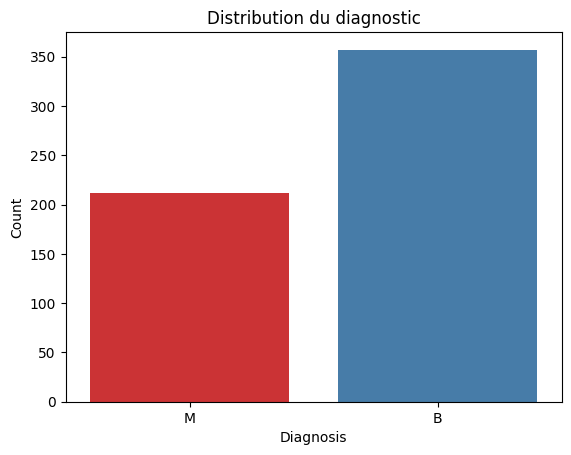

In [679]:
distribution = data['diagnosis'].value_counts()
print(distribution)

sns.countplot(x="diagnosis", data=data, palette="Set1")
plt.title("Distribution du diagnostic")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


> Environ 37% des tumeurs sont benines et 67% sont malines.

> Valeurs a comparer avec les resultats de la prediction...

    Encodage de la variable "diagnosis"

In [680]:
data["diagnosis"] = data["diagnosis"].map({ "M": 1, "B": 0})
data["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

    Corrélation entre les variables

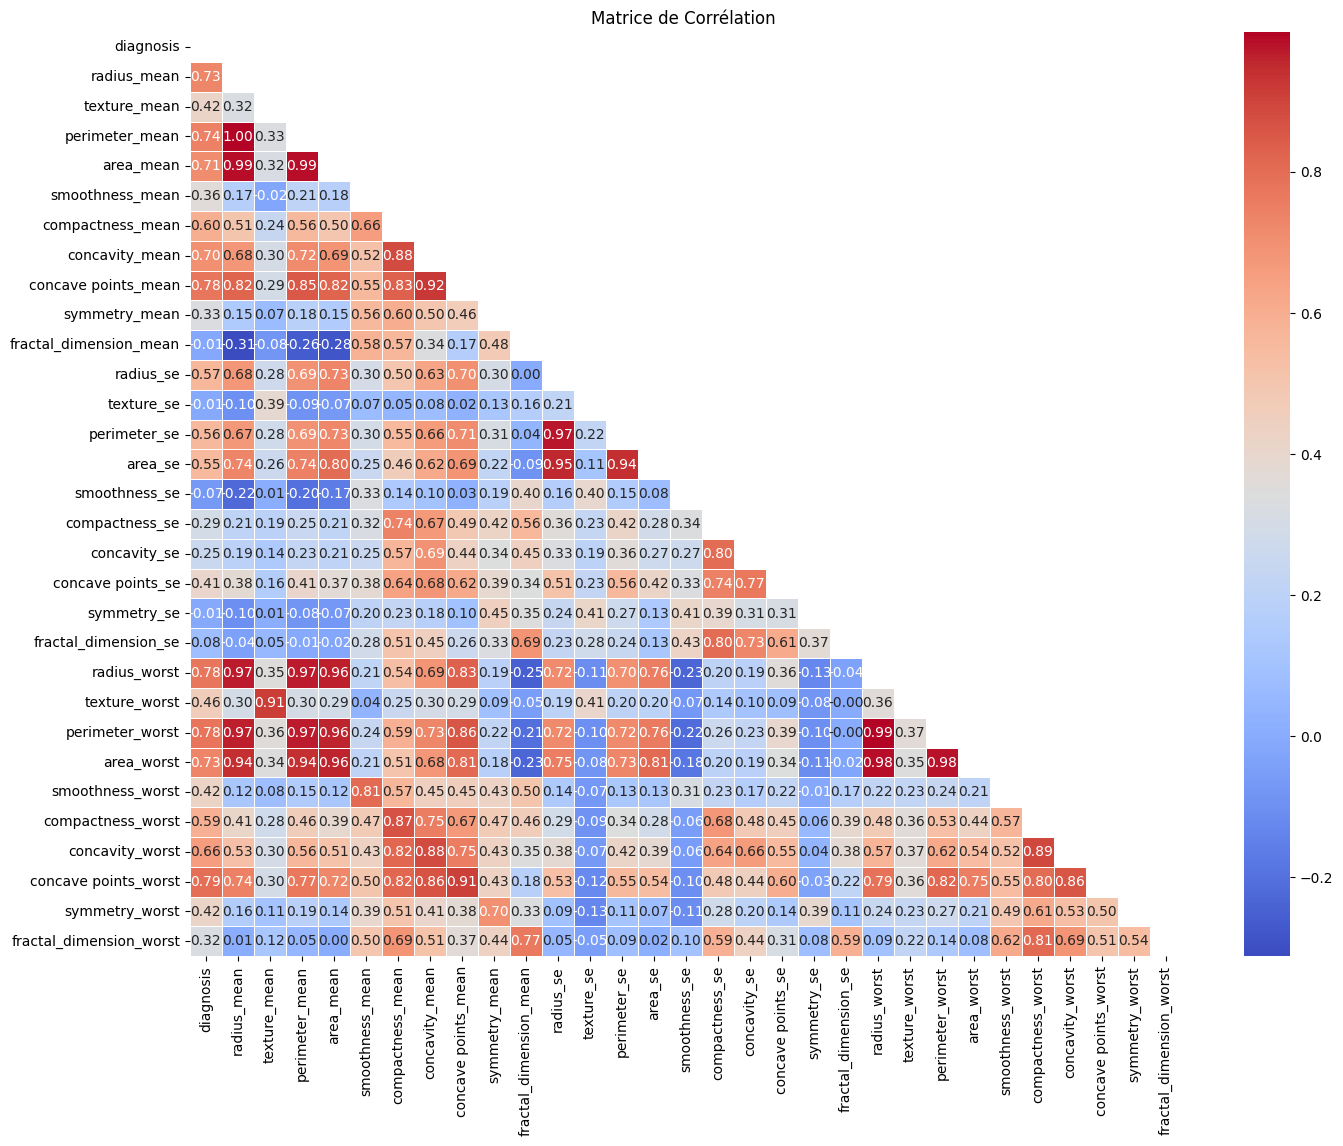

In [681]:
# Calcul de la matrice de corrélation
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot complet sans mask, avec annotations dans chaque case
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,      
    fmt='.2f',        
    cmap='coolwarm',  
    linewidths=0.5
)
plt.title('Matrice de Corrélation ')
plt.show()

> On remarque que plusieurs variables sont fortement correlees :
- radius_mean avec area_mean, et perimeter_mean
- compactness_mean avec concavity_mean et concave_points_mean
- radius_se avec area_se et perimeter_se
- compactness_se avec concavity_se et fractal_dimension_se
- chaque attribut *-*_worst avec le meme attribut *-*_mean

> On peut donc mettre de cote certaines variables qui creent de la redondance et affaiblissent la performance du modele (surapprentissage)

In [682]:
## -- Voici les variables gardees -- ##
new_data = data[['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst']]

    Detection de valeurs aberantes

In [683]:
print((new_data == 0).sum())

diagnosis                 357
radius_mean                 0
texture_mean                0
smoothness_mean             0
compactness_mean            0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
smoothness_se               0
compactness_se              0
concave points_se          13
symmetry_se                 0
symmetry_worst              0
dtype: int64


> La variable 'concave points_se' peut avoir 0 comme valeurs.

> Cela signifie que la tumeur est lisse et que sa forme ne contient pas d'irregularite.

In [684]:
# Fonction pour détecter les outliers par IQR
def detect_outliers_iqr(df, column):
    # Calcul des quantiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'IQR
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return len(outliers)

# Liste des colonnes à vérifier
columns_to_check = new_data.columns[1:]

# Initialiser un compteur pour les outliers
total_outliers = 0


# Détection des outliers pour chaque colonne
for column in columns_to_check:
    outliers_count = detect_outliers_iqr(new_data, column)
    total_outliers += outliers_count
    print(f"Outliers détectés avec IQR pour {column}: {outliers_count} valeurs aberrantes")

# Affichage du nombre total d'outliers détectés
print(f"\nNombre total des outliers détectés : {total_outliers}")


Outliers détectés avec IQR pour radius_mean: 14 valeurs aberrantes
Outliers détectés avec IQR pour texture_mean: 7 valeurs aberrantes
Outliers détectés avec IQR pour smoothness_mean: 6 valeurs aberrantes
Outliers détectés avec IQR pour compactness_mean: 16 valeurs aberrantes
Outliers détectés avec IQR pour symmetry_mean: 15 valeurs aberrantes
Outliers détectés avec IQR pour fractal_dimension_mean: 15 valeurs aberrantes
Outliers détectés avec IQR pour radius_se: 38 valeurs aberrantes
Outliers détectés avec IQR pour texture_se: 20 valeurs aberrantes
Outliers détectés avec IQR pour smoothness_se: 30 valeurs aberrantes
Outliers détectés avec IQR pour compactness_se: 28 valeurs aberrantes
Outliers détectés avec IQR pour concave points_se: 19 valeurs aberrantes
Outliers détectés avec IQR pour symmetry_se: 27 valeurs aberrantes
Outliers détectés avec IQR pour symmetry_worst: 23 valeurs aberrantes

Nombre total des outliers détectés : 258


> Les valeurs aberantes representent plus que 40% de nos donnees, il faut savoir lesquelles on peut enlever.

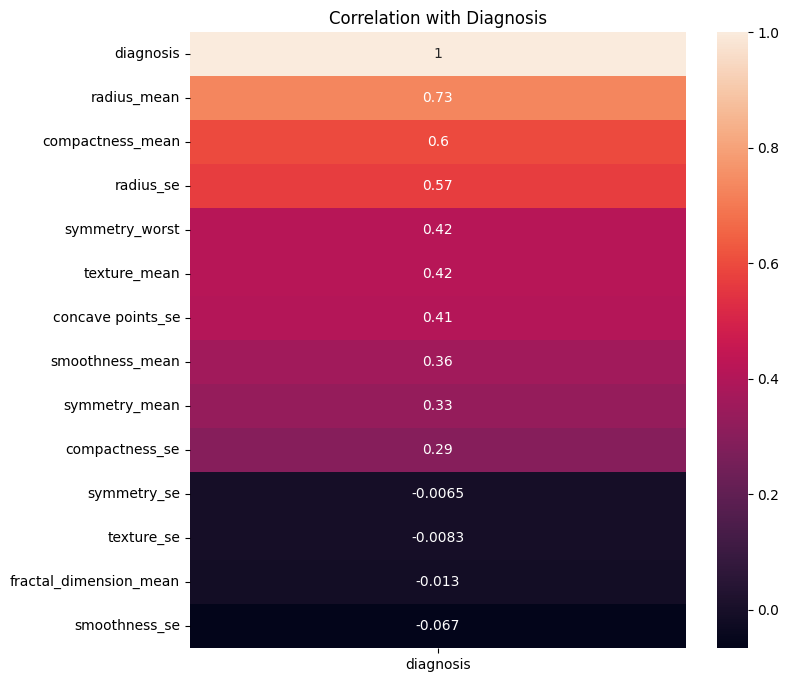

In [685]:
plt.figure(figsize=(8,8))
correlation = new_data.corr()
sns.heatmap(correlation[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()


> On doit garder le maximum de valeurs pour les variables les plus correlees avec 'diagnosis'

In [686]:
# def replace_outliers_with_median(df, columns):
#     df_clean = df.copy()
#     outliers_count = {}
    
#     for col in columns:

#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         # Bornes
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Outliers
#         outliers_condition = (df[col] < lower_bound) | (df[col] > upper_bound)
#         n_outliers = len(df[outliers_condition])
        
#         if n_outliers > 0:
#             # Calcul de la médiane (sans les outliers)
#             median = df[col][~outliers_condition].median()
            
#             # Remplacement des outliers
#             df_clean.loc[outliers_condition, col] = median
            
#         outliers_count[col] = n_outliers
    
#     return df_clean, outliers_count

# #columns_to_check = new_data.columns[1:]
# columns_to_check = ['radius_mean', 'compactness_mean', 'radius_se']

# # Application
# data_clean, outliers_report = replace_outliers_with_median(new_data, columns_to_check)

# # Rapport
# print("Nombre d'outliers remplacés par colonne :")
# for col, count in outliers_report.items():
#     print(f"{col}: {count}")

In [687]:
# def remove_outliers_iqr(df, columns):
    
#     outliers_report = {}
#     df_clean = df.copy()
    
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Masque pour garder les valeurs NON outliers
#         non_outliers = (df[col] >= lower_bound) & (df[col] <= upper_bound)
#         n_outliers = len(df) - non_outliers.sum()
        
#         outliers_report[col] = n_outliers
#         df_clean = df_clean.loc[non_outliers]
    
#     print("Rapport de suppression des outliers:")
#     print("-" * 40)
#     for col, count in outliers_report.items():
#         print(f"{col}: {count} outliers supprimés")
#     print(f"\nTaille originale: {len(df)} obs")
#     print(f"Taille après suppression: {len(df_clean)} obs")
#     print(f"Total outliers supprimés: {len(df) - len(df_clean)}")
    
#     return df_clean, outliers_report

# columns_to_check = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se']
# data_clean, outliers_report = remove_outliers_iqr(data_clean, columns_to_check)

    Separation variables explicatives/cible

In [688]:
print(new_data.shape)
print(data_clean.shape)

(569, 14)
(475, 14)


In [689]:
## -- Donnees non modifiees (31 varaibles et 569 obs) -- ##
X0 = data.drop('diagnosis', axis=1)
Y0 = data['diagnosis']

In [690]:
## -- Variables filtrees (12 variables et 569 obs) -- ##
X1 = new_data.drop('diagnosis', axis=1)
Y1 = new_data['diagnosis']

In [691]:
## -- Varaibles et Obs filtrees (12 variables et 542 obs) -- ##
X = data_clean.drop("diagnosis", axis=1)
Y = data_clean["diagnosis"]

    Normalisation des variables explicatives

In [692]:
scaler1 = StandardScaler()
scaler2 = RobustScaler()
X0_scaled = scaler1.fit_transform(X0)
X1_scaled = scaler1.fit_transform(X1)
X_scaled = scaler2.fit_transform(X)

    Separation des donnees : entrainement/test

In [693]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0_scaled, Y0, test_size=0.2, random_state=42 )
print("X0_train: ", X0_train.shape)
print("X0_test: ", X0_test.shape)
print("Y0_train: ", Y0_train.shape)
print("Y0_test: ", Y0_test.shape)

X0_train:  (455, 30)
X0_test:  (114, 30)
Y0_train:  (455,)
Y0_test:  (114,)


In [694]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scaled, Y1, test_size=0.2, random_state=42 )
print("X1_train: ", X1_train.shape)
print("X1_test: ", X1_test.shape)
print("Y1_train: ", Y1_train.shape)
print("Y1_test: ", Y1_test.shape)

X1_train:  (455, 13)
X1_test:  (114, 13)
Y1_train:  (455,)
Y1_test:  (114,)


In [695]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (380, 13)
X_test:  (95, 13)
Y_train:  (380,)
Y_test:  (95,)


Creation des modeles logistiques

In [696]:
model_0 = LogisticRegression()

model_1 = LogisticRegression()

model_2 = LogisticRegression()

model_3 = LogisticRegression(
    penalty = 'l2',
    C=0.1,
    class_weight = None,
    max_iter = 100,
    multi_class = 'auto',
    solver = 'liblinear',
    random_state= 42,
    l1_ratio= 0.0
)

    Entrainement des modeles

> Modele entraine sans filtrage des variables et des observations

In [697]:
model_0.fit(X0_train, Y0_train)

LogisticRegression()

Modele entraine avec selection des variables et imputation des observations

In [698]:
model_1.fit(X_train, Y_train)

LogisticRegression()

Modele entraine avec selection des variables

In [699]:
model_2.fit(X1_train, Y1_train)

LogisticRegression()

Modele precedent + selection des hyperparametres

In [700]:
model_3.fit(X1_train, Y1_train)

LogisticRegression(C=0.1, l1_ratio=0.0, multi_class='auto', random_state=42,
                   solver='liblinear')

    Predictions

In [701]:
Y0_pred = model_0.predict(X0_test)
Y1_pred = model_1.predict(X_test)
Y2_pred = model_2.predict(X1_test)
Y3_pred = model_3.predict(X1_test)

                    EVALUATION DU MODELE

    Matrices de confusions, accuracy et rapports de classifications

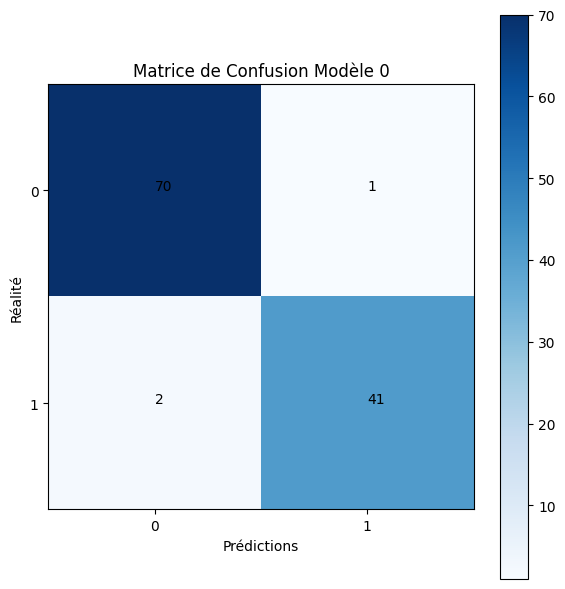

In [715]:
## -- Matrice de confusion modele 0 -- ##
cm_0 = confusion_matrix(Y0_test, Y0_pred)

## -- Visualisation de la matrice -- ##
fig, ax = plt.subplots(figsize=(6, 6))
im_0 = ax.imshow(cm_0, cmap=plt.cm.Blues, interpolation='nearest')

## -- Annotation des cellules avec les effectifs -- ##
for i in range(cm_0.shape[0]):
    for j in range(cm_0.shape[1]):
        ax.text(j, i, cm_0[i, j], color="black")

## -- Labels -- ##
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Réalité')
ax.set_title('Matrice de Confusion Modèle 0')

##---- Colorbar ----##
fig.colorbar(im_0, ax=ax)

plt.tight_layout()
plt.show()

In [703]:
accuracy_0 = accuracy_score(Y0_test, Y0_pred)
print(f"Accuracy modele 0 (no filter) : {accuracy_0: .3f}")

print(F"\nClassification Report modele 0 : \n {classification_report(Y0_test, Y0_pred)}")

Accuracy modele 0 (no filter) :  0.974

Classification Report modele 0 : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



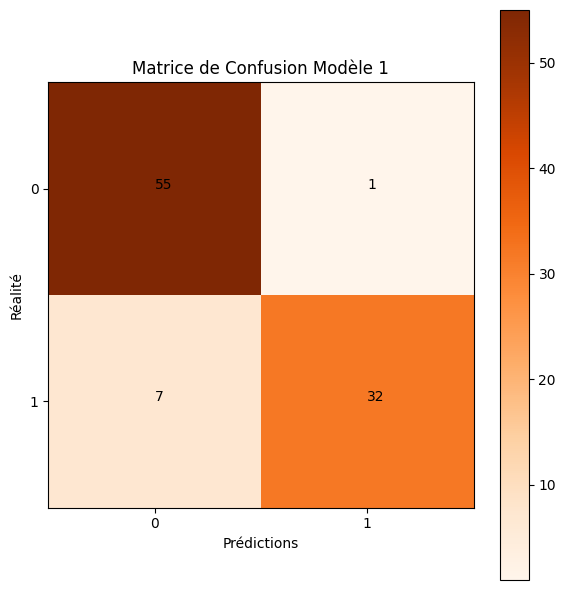

In [713]:
## -- Matrice de confusion modele 1 -- ##
cm_1 = confusion_matrix(Y_test, Y1_pred)

## -- Visualisation de la matrice -- ##
fig, ax = plt.subplots(figsize=(6, 6))
im_1 = ax.imshow(cm_1, cmap=plt.cm.Oranges, interpolation='nearest')

## -- Annotation des cellules avec les effectifs -- ##
for i in range(cm_1.shape[0]):
    for j in range(cm_1.shape[1]):
        ax.text(j, i, cm_1[i, j], color="black")

## -- Labels -- ##
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Réalité')
ax.set_title('Matrice de Confusion Modèle 1')

## -- Colorbar -- ##
fig.colorbar(im_1, ax=ax)

plt.tight_layout()
plt.show()

In [705]:
accuracy_1 = accuracy_score(Y_test, Y1_pred)
print(f"Accuracy modele 1 (filter variables + median impt) : {accuracy_1: .3f}")

print(F"\nClassification Report modele 1 : \n {classification_report(Y_test, Y1_pred)}")

Accuracy modele 1 (filter variables + median impt) :  0.916

Classification Report modele 1 : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.97      0.82      0.89        39

    accuracy                           0.92        95
   macro avg       0.93      0.90      0.91        95
weighted avg       0.92      0.92      0.91        95



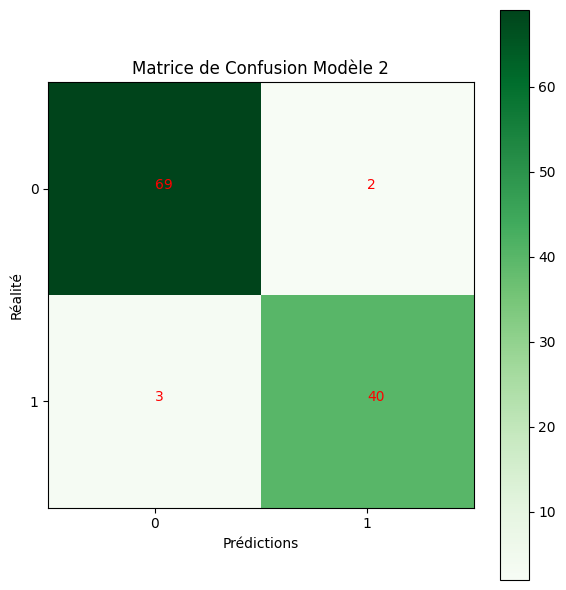

In [711]:
## -- Matrice de confusion modele 2 -- ##
cm_2 = confusion_matrix(Y1_test, Y2_pred)

fig, ax = plt.subplots(figsize=(6, 6))
im_2 = ax.imshow(cm_2, cmap=plt.cm.Greens, interpolation='nearest')

## -- Annotation des cellules avec les effectifs -- ##
for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        ax.text(j, i, cm_2[i, j], color="red")

## -- Labels -- ##
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Réalité')
ax.set_title('Matrice de Confusion Modèle 2')

## -- Colorbar -- ##
fig.colorbar(im_2, ax=ax)

plt.tight_layout()
plt.show()

In [707]:
accuracy_2 = accuracy_score(Y1_test, Y2_pred)
print(f"Accuracy modele 2 (filter variables) : {accuracy_2: .3f}")

print(f"\nClassification Report modele 2 : \n {classification_report(Y1_test, Y2_pred)}")

Accuracy modele 2 (filter variables) :  0.956

Classification Report modele 2 : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



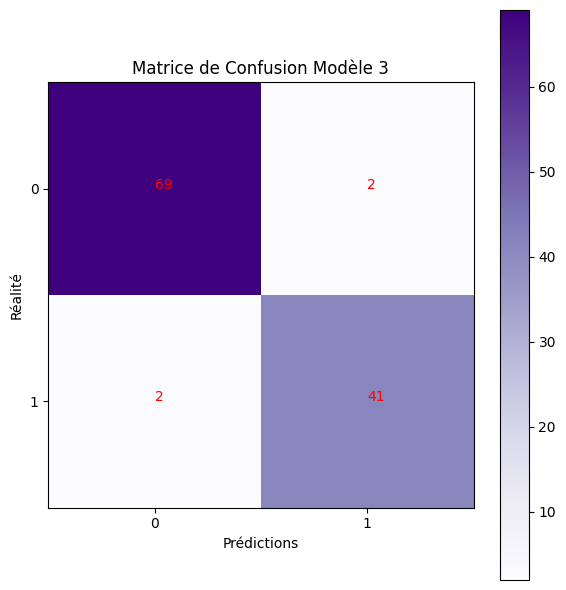

In [708]:
## -- Matrice de conusion modele 3 -- ##
cm_3 = confusion_matrix(Y1_test, Y3_pred)

fig, ax = plt.subplots(figsize=(6, 6))
im_3 = ax.imshow(cm_3, cmap=plt.cm.Purples, interpolation='nearest')

## -- Annotation des cellules avec les effectifs -- ##
for i in range(cm_3.shape[0]):
    for j in range(cm_3.shape[1]):
        ax.text(j, i, cm_3[i, j], color="red")

## -- Labels -- ##
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Réalité')
ax.set_title('Matrice de Confusion Modèle 3')

## -- Colorbar -- ##
fig.colorbar(im_3, ax=ax)

plt.tight_layout()
plt.show()

In [709]:
accuracy_3 = accuracy_score(Y1_test, Y3_pred)
print(f"Accuracy modele 3 (filter variables + hyperparameters) : {accuracy_3: .3f}")
print(f"\nClassification Report modele 3 : \n {classification_report(Y1_test, Y3_pred)}")


Accuracy modele 3 (filter variables + hyperparameters) :  0.965

Classification Report modele 3 : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



    Courbes ROC et AUC

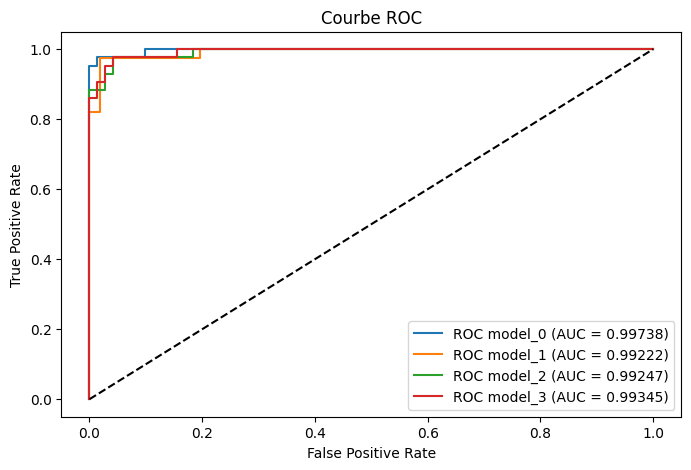

In [710]:
Y0_prob = model_0.predict_proba(X0_test)[:,1]
fpr0, tpr0, thresholds0 = roc_curve(Y0_test, Y0_prob)
roc_auc0 = auc(fpr0, tpr0)

Y1_prob = model_1.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y1_prob)
roc_auc1 = auc(fpr1, tpr1)

Y2_prob = model_2.predict_proba(X1_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(Y1_test, Y2_prob)
roc_auc2 = auc(fpr2, tpr2)

Y3_prob = model_3.predict_proba(X1_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(Y1_test, Y3_prob)
roc_auc3 = auc(fpr3, tpr3)


plt.figure(figsize=(8, 5) )
plt.plot(fpr0, tpr0, label='ROC model_0 (AUC = {:.5f})'.format(roc_auc0))
plt.plot(fpr1, tpr1, label='ROC model_1 (AUC = {:.5f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, label='ROC model_2 (AUC = {:.5f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, label='ROC model_3 (AUC = {:.5f})'.format(roc_auc3))

plt.plot([0,1], [0,1], 'k--')  # Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

                        INTERPRETATION DES RESULTATS 

    Modele 0 :
- Données non nettoyées : le modèle a reçu des informations répétitives le poussant a faire du surapprentissage => accuracy = 0.974

    Modele 1 :
- Données nettoyées : les valeurs extremes ont ete enlevees. La performance a baisse => accuracy = 0.916

    Modele 2 :
- Le modèle s'améliore un peu après losrqu'il est entraine avec les outliers => accuracy = 0.956 

    Modele 3 :
- Choix d'hyperparamètres spécifiques : le modele s'améliore encore => accuracy = 0.965